In [ ]:
import matplotlib.pyplot as plt
import random
import time

In [ ]:
def bubble_sort(arr):
    n = len(arr)
    steps = 0
    for i in range(n):
        for j in range(0, n-i-1):
            steps += 1
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return steps

def merge_sort(arr):
    steps = [0]
    def _merge_sort(arr, steps):
        if len(arr) > 1:
            mid = len(arr) // 2
            L = arr[:mid]
            R = arr[mid:]

            _merge_sort(L, steps)
            _merge_sort(R, steps)

            i = j = k = 0
            while i < len(L) and j < len(R):
                steps[0] += 1
                if L[i] < R[j]:
                    arr[k] = L[i]
                    i += 1
                else:
                    arr[k] = R[j]
                    j += 1
                k += 1

            while i < len(L):
                steps[0] += 1
                arr[k] = L[i]
                i += 1
                k += 1

            while j < len(R):
                steps[0] += 1
                arr[k] = R[j]
                j += 1
                k += 1
    _merge_sort(arr, steps)
    return steps[0]

def quick_sort(arr):
    steps = [0]
    def _quick_sort(arr, low, high, steps):
        if low < high:
            pi = partition(arr, low, high, steps)
            _quick_sort(arr, low, pi-1, steps)
            _quick_sort(arr, pi+1, high, steps)

    def partition(arr, low, high, steps):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            steps[0] += 1
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i+1], arr[high] = arr[high], arr[i+1]
        return i + 1

    _quick_sort(arr, 0, len(arr)-1, steps)
    return steps[0]


In [ ]:
def generate_data(size, case_type):
    if case_type == "best":
        return list(range(size))
    elif case_type == "worst":
        return list(range(size, 0, -1))
    elif case_type == "average":
        return random.sample(range(size * 2), size)

# Function to plot graph
def plot_graph(x, y_data, title, ylabel):
    plt.figure(figsize=(10, 6))
    for label, y in y_data.items():
        plt.plot(x, y, marker='o', label=label)
    plt.title(title)
    plt.xlabel('Number of Repetitions')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


Time complexities for Best case:
Bubble Sort: [0.005275511741638183, 0.004223453998565674, 0.004433830579121907, 0.005311721563339233]
Merge Sort: [0.000763392448425293, 0.0006319999694824219, 0.0007304986317952474, 0.0007666110992431641]
Quick Sort: [0.011932992935180664, 0.011239182949066163, 0.010871473948160808, 0.010212057828903198]


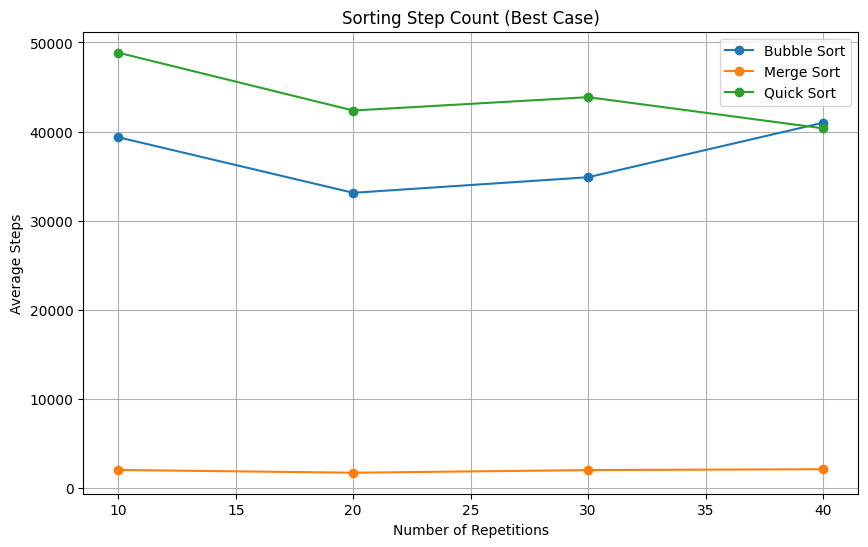

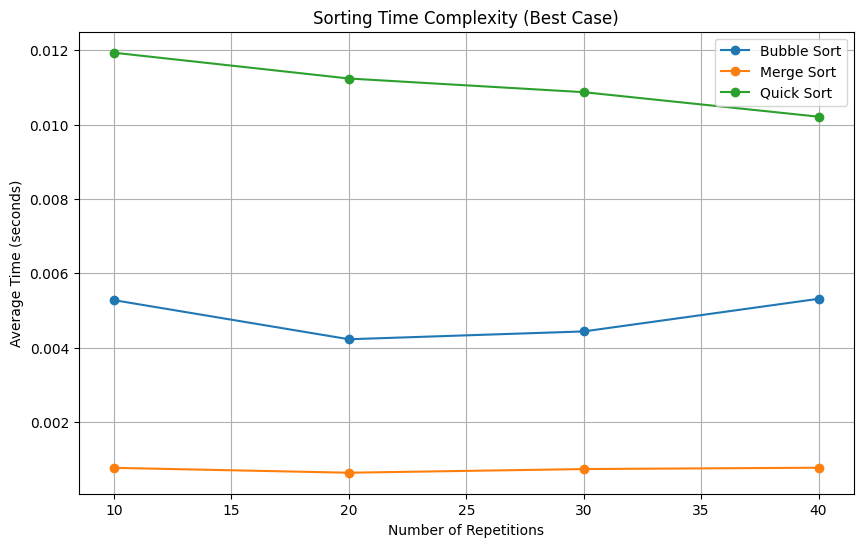

Time complexities for Worst case:
Bubble Sort: [0.009928369522094726, 0.010215771198272706, 0.014073801040649415, 0.014896094799041748]
Merge Sort: [0.0006154060363769531, 0.0006874322891235352, 0.001651318868001302, 0.0016936242580413818]
Quick Sort: [0.009677648544311523, 0.007655715942382813, 0.019086654980977377, 0.015166789293289185]


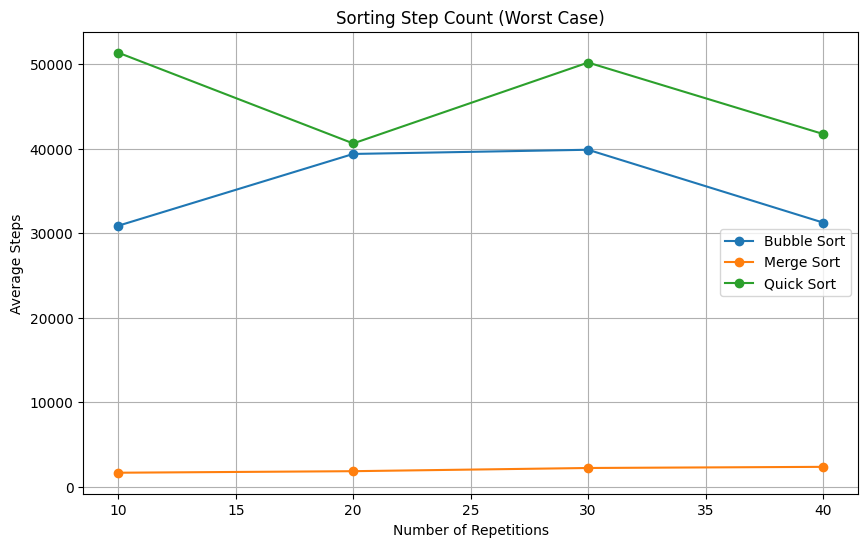

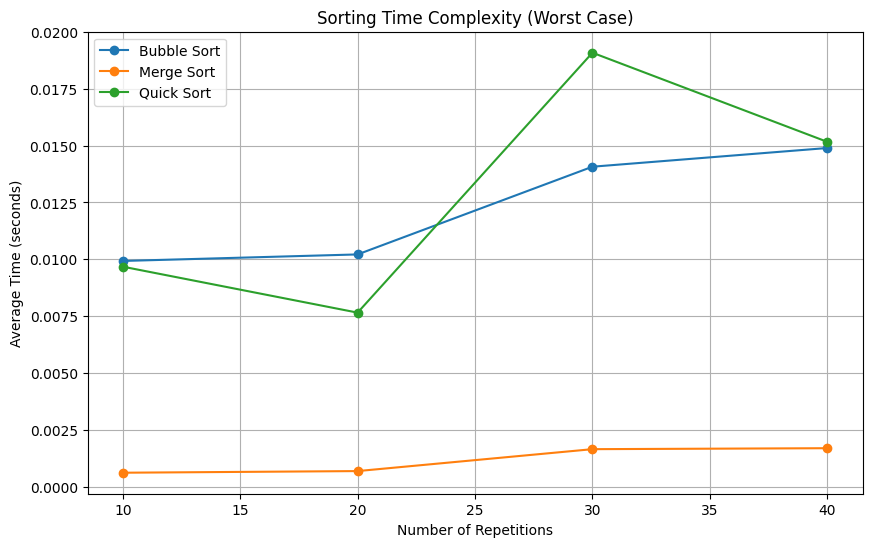

Time complexities for Average case:
Bubble Sort: [0.01032106876373291, 0.008284354209899902, 0.00641640822092692, 0.007530808448791504]
Merge Sort: [0.000712442398071289, 0.0010366082191467286, 0.0010048786799112955, 0.000945878028869629]
Quick Sort: [0.000611257553100586, 0.00052032470703125, 0.0006352345148722331, 0.0004625797271728516]


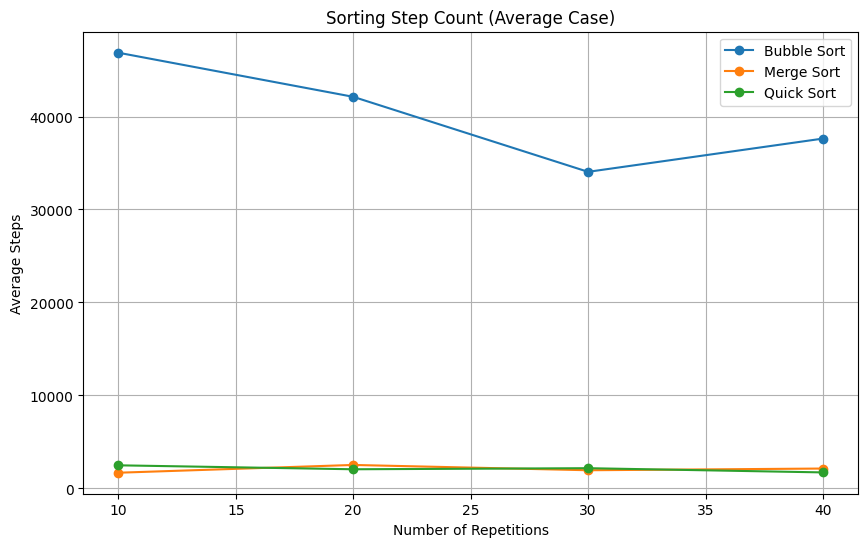

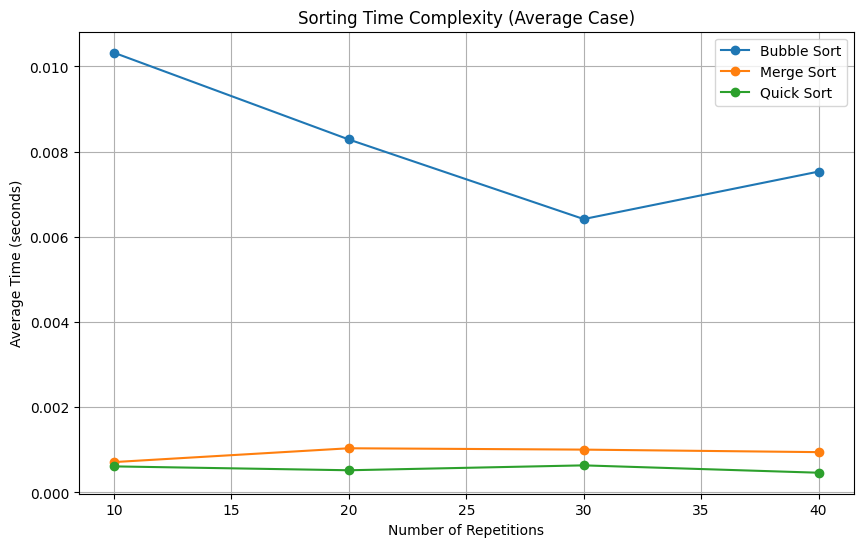

In [ ]:
def main():
    repetitions = [10, 20, 30, 40]
    sizes = [100, 200, 300, 400]
    cases = ["best", "worst", "average"]
    sorting_algorithms = {
        "Bubble Sort": bubble_sort,
        "Merge Sort": merge_sort,
        "Quick Sort": quick_sort,
    }

    for case in cases:
        step_counts = {algo: [] for algo in sorting_algorithms.keys()}
        time_complexities = {algo: [] for algo in sorting_algorithms.keys()}  # Initialize dictionary to store time complexities
        for rep in repetitions:
            for algo_name, sort_func in sorting_algorithms.items():
                total_steps = 0
                total_time = 0  # Initialize total_time to measure execution time
                for _ in range(rep):
                    data = generate_data(random.choice(sizes), case)
                    start_time = time.time()  # Record start time
                    total_steps += sort_func(data.copy())
                    end_time = time.time()  # Record end time
                    total_time += (end_time - start_time)  # Calculate and accumulate time taken
                avg_steps = total_steps / rep
                avg_time = total_time / rep  # Calculate average time
                step_counts[algo_name].append(avg_steps)
                time_complexities[algo_name].append(avg_time)  # Append average time to the list

        print(f"Time complexities for {case.capitalize()} case:")  # Print the time complexities
        for algo_name, times in time_complexities.items():
            print(f"{algo_name}: {times}")

        plot_graph(repetitions, step_counts, f'Sorting Step Count ({case.capitalize()} Case)', 'Average Steps')
        plot_graph(repetitions, time_complexities, f'Sorting Time Complexity ({case.capitalize()} Case)', 'Average Time (seconds)')  # Plot the time complexities

if __name__ == "__main__":
    main()